In [102]:
# Importing neccessary packages
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [103]:
df= pd.read_csv('Telco_Customer_Churn.csv')
df.head()

CustomerID  Count        Country       State         City  Zip_Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat_Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless_Billing             Payment_Method  Monthly_Charges Total_Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churthn_Label Churn_Value Churn_Score  CLTV                   Churn_Reason  
0           Yes           1          86  3239   Competitor made better offer  
1           Yes           1          67  2701                          Moved  
2           Yes           1          86  5372                          Moved  
3           Yes           1          84  5003                          Moved  
4           Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   int64  
 6   Lat_Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Internet_Service   7043 

#### From analysis the dataset, we notice that some of the independent features are in numerical and most of feature are in categorical feature. Seperate into numerical and categorical data for EDA parts


In [105]:
df.columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churthn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason']
df.head(2)

CustomerID  Count        Country       State         City  Zip_Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   

                 Lat_Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   

  Paperless_Billing    Payment_Method  Monthly_Charges Total_Charges  \
0               Yes      Mailed check            53.85        108.15   
1               Yes  Electronic check            70.70        151.65   

  Churthn_Label Churn_Value Churn_Score  CLTV                  Churn_Reason  
0           Yes           1          86  3239  Competitor made better offer  
1           Yes           1          67  2701                         Moved  

[2 rows x 33 columns]

In [106]:
#Total charges are in object dtype so convert into Numerical feature 
df['Total_Charges'] = pd.to_numeric(data['Total_Charges'], errors='coerce')

#### Separate into Numerical and Categorical feature

In [107]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 10
Numerical feature are:
 {'Longitude', 'Zip_Code', 'Count', 'Latitude', 'Monthly_Charges', 'Churn_Value', 'CLTV', 'Total_Charges', 'Churn_Score', 'Tenure_Months'}


In [108]:
# Categorical feature
categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 23
Categorical feature are:
 {'Streaming_Movies', 'Senior_Citizen', 'Device_Protection', 'Lat_Long', 'Country', 'Contract', 'Streaming_TV', 'Churn_Reason', 'Phone_Service', 'CustomerID', 'Partner', 'Online_Backup', 'Gender', 'State', 'Internet_Service', 'Online_Security', 'City', 'Paperless_Billing', 'Payment_Method', 'Multiple_Lines', 'Churthn_Label', 'Tech_Support', 'Dependents'}


### EDA

In [109]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churthn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

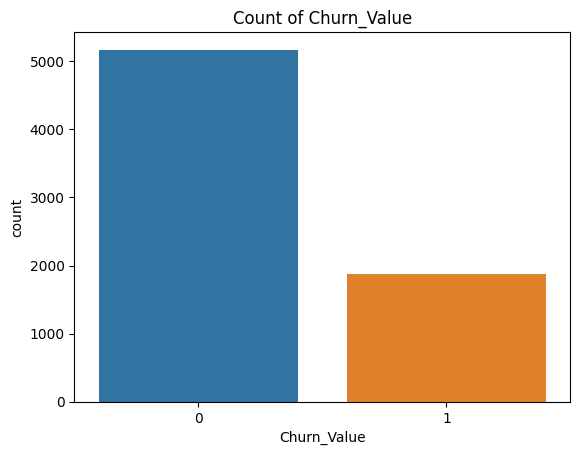

In [110]:
# plotting with target feature
sns.countplot(data=df, x='Churn_Value')
plt.title('Count of Churn_Value')
plt.show()

In [119]:
l1 = df.loc[df['Churn_Value']== 1].count()[0]
print(f"Pecentage of Left: {l1/len(data['Churn_Value'])}")
print(df.Churn_Value.value_counts())

Pecentage of Left: 0.2653698707936959
0    5174
1    1869
Name: Churn_Value, dtype: int64


#### 1869 of customer are left about 26.5 percentage from overall, this like an imbalance dataset

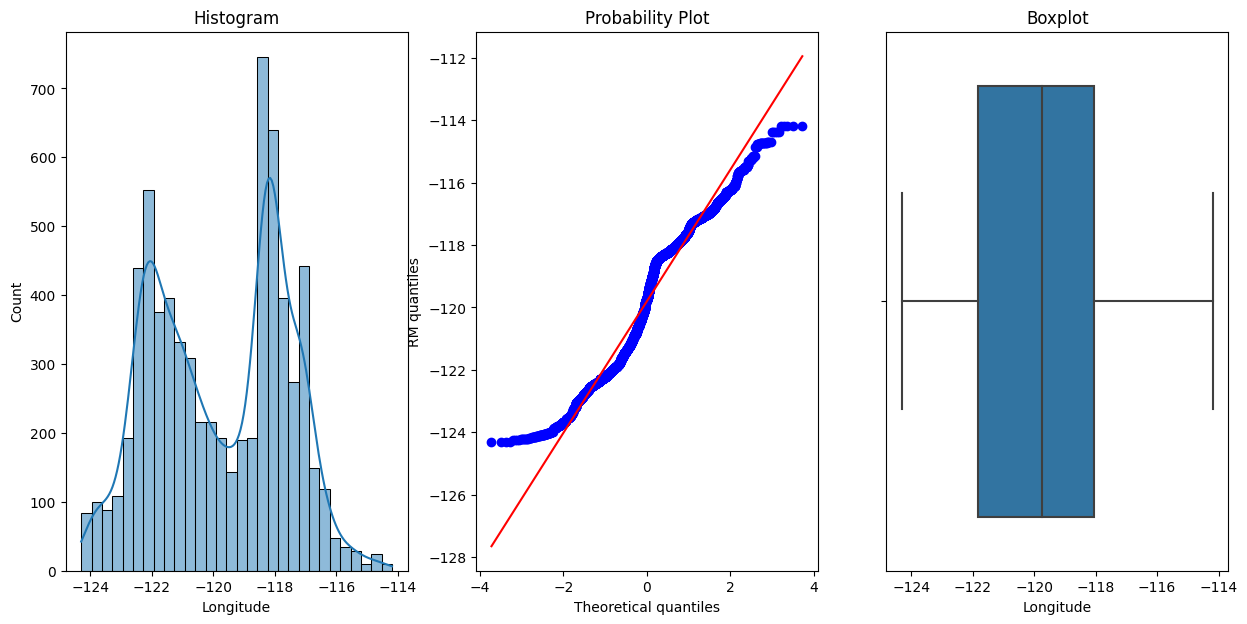

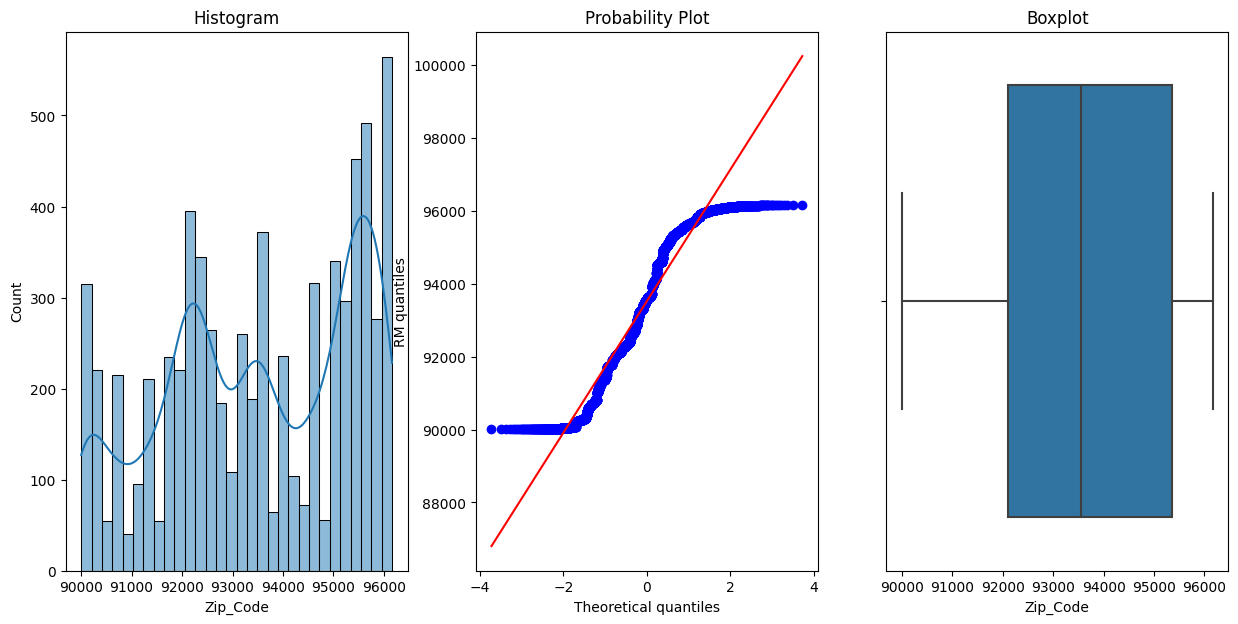

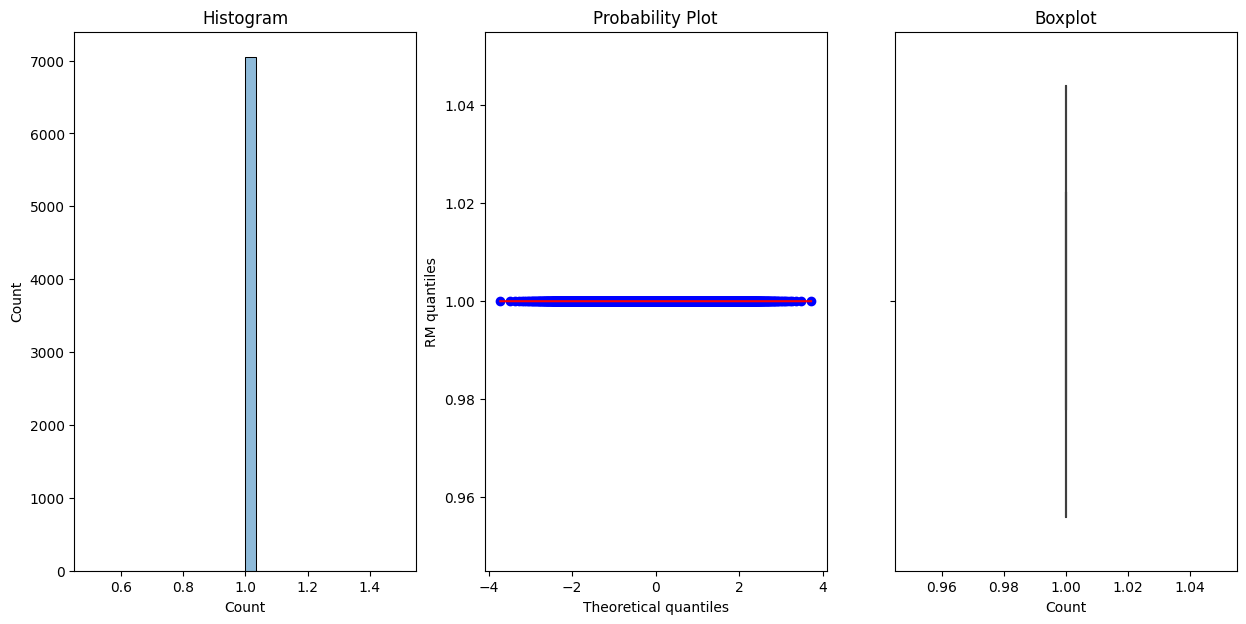

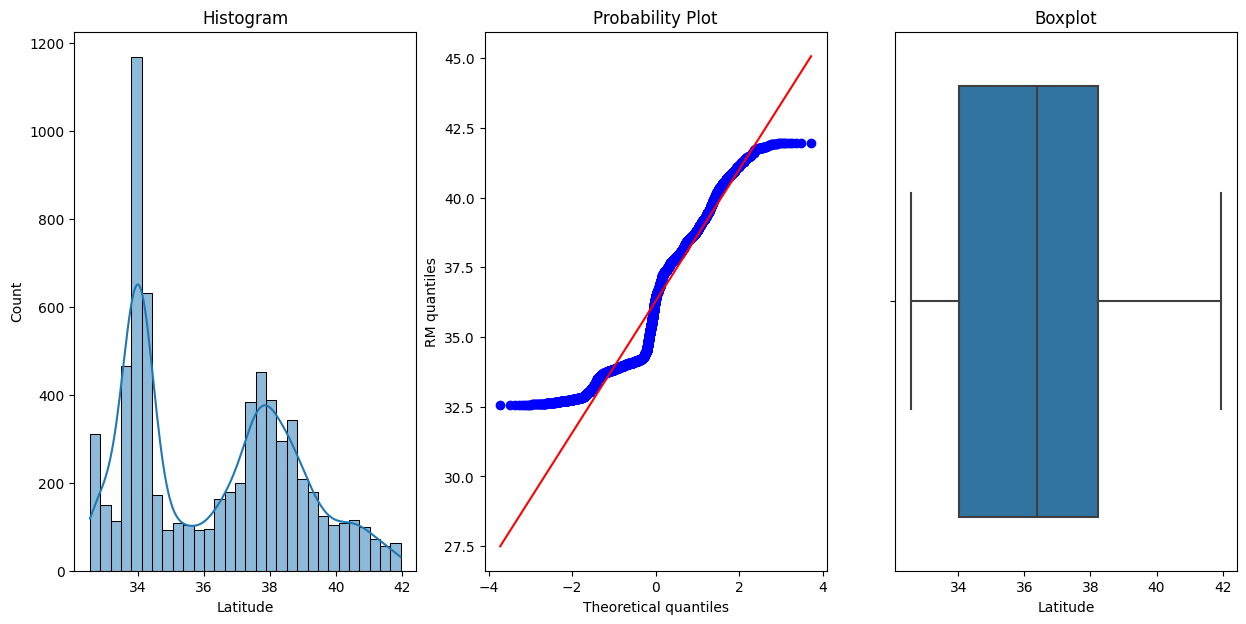

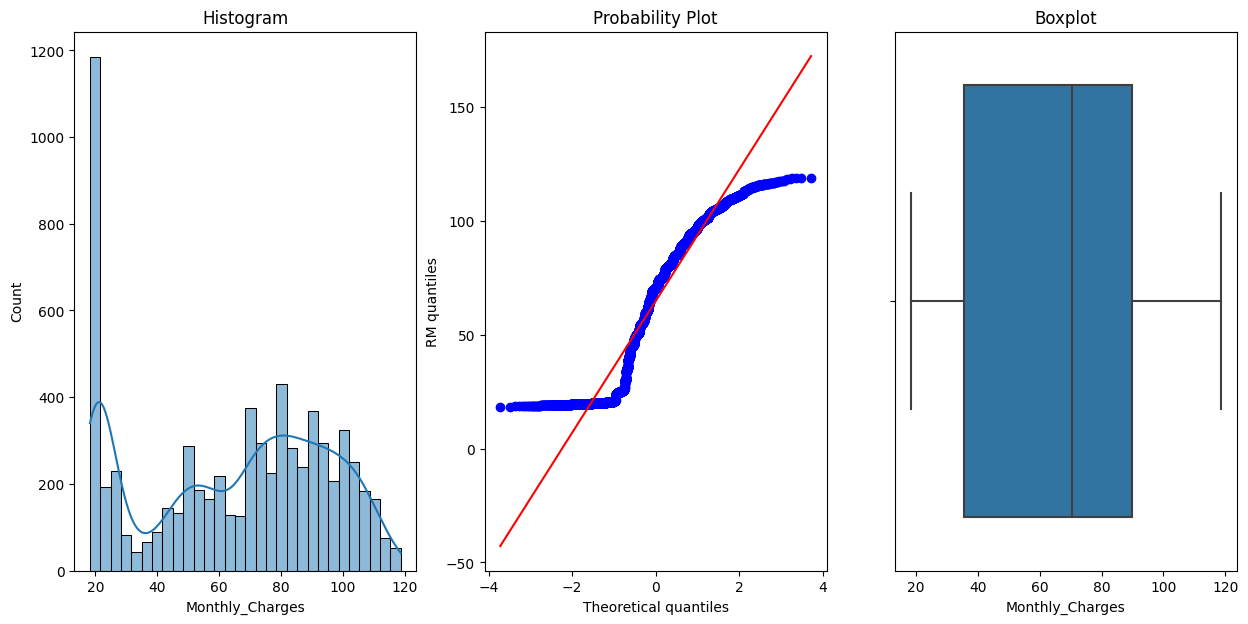

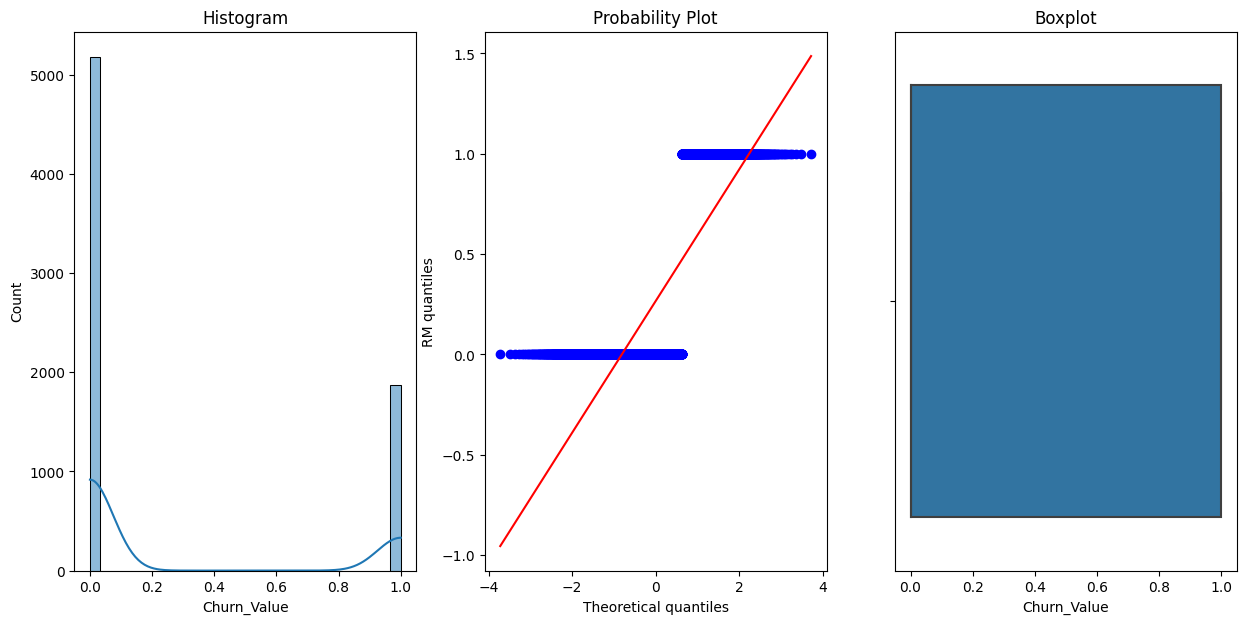

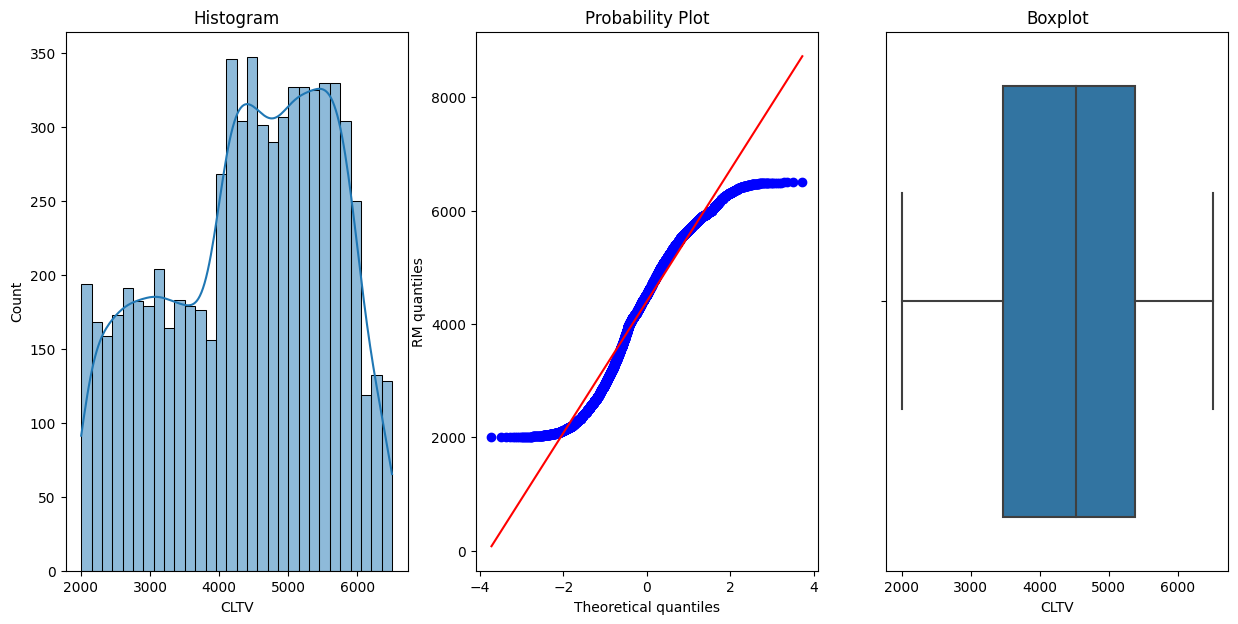

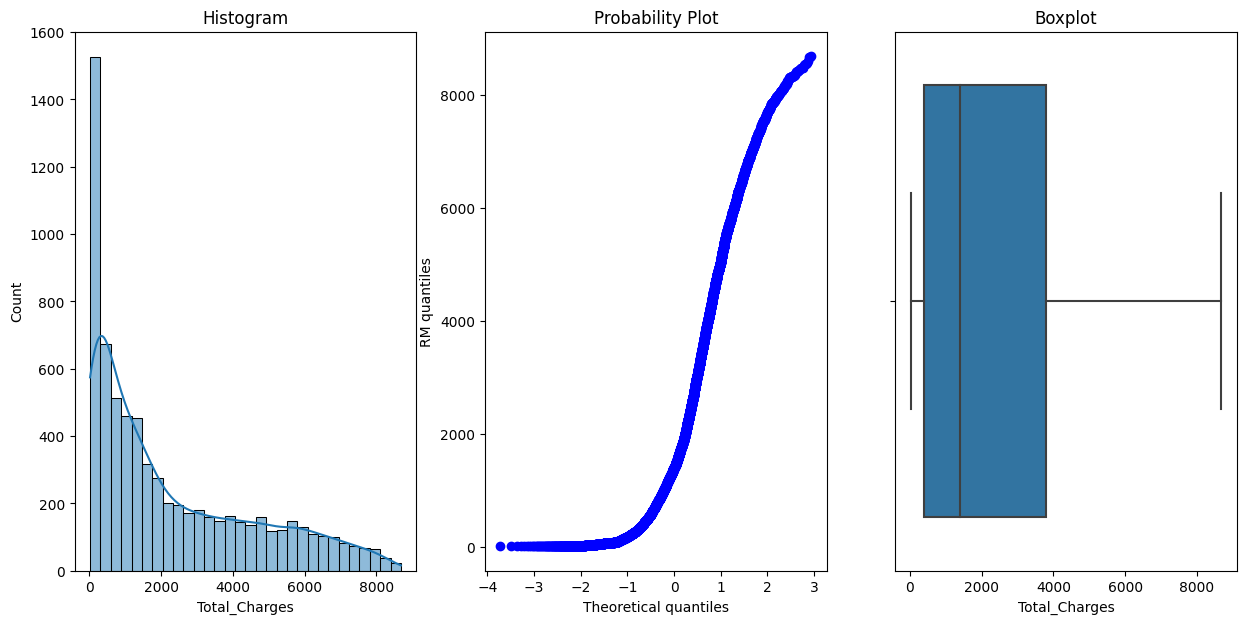

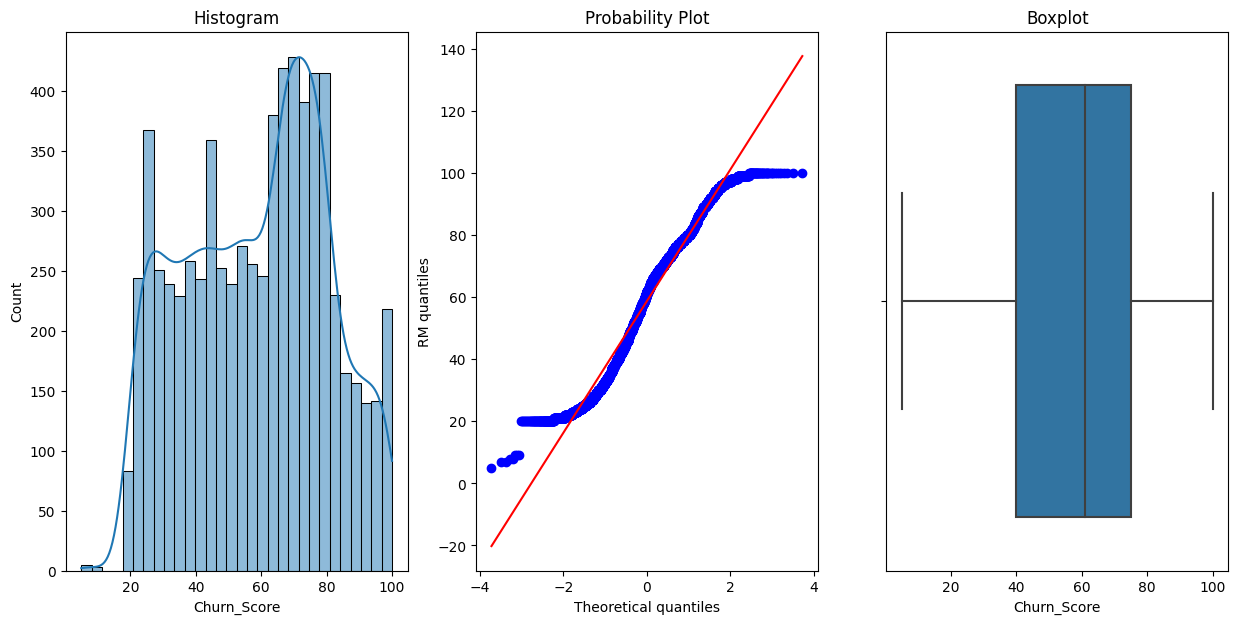

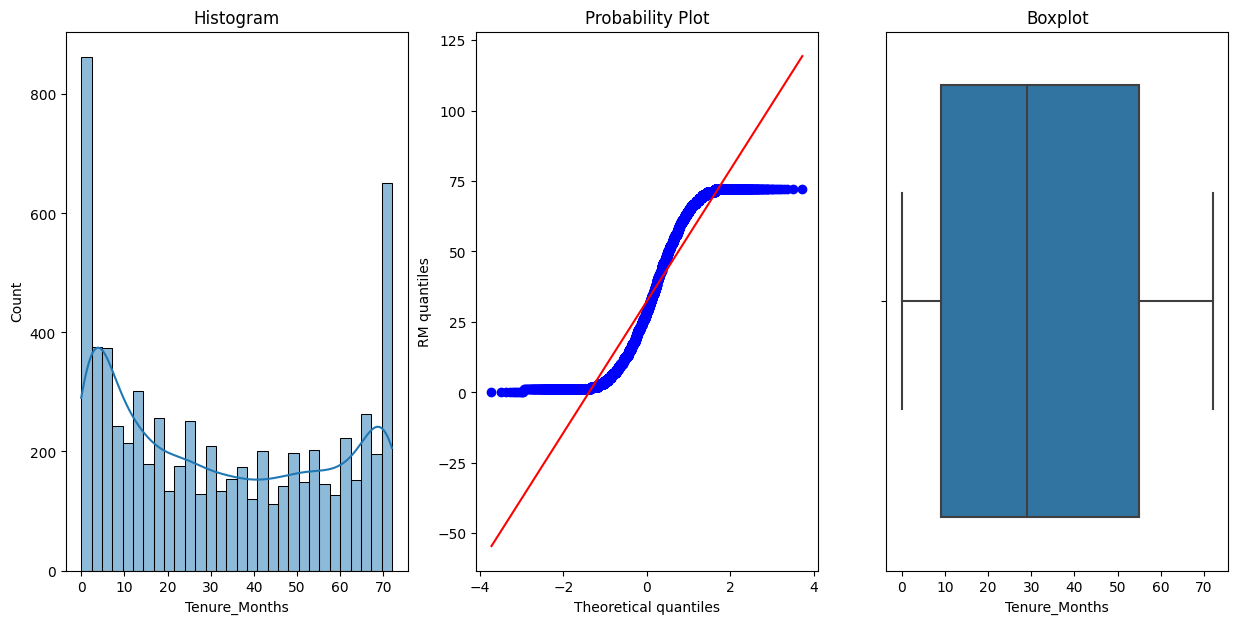

In [120]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'Senior_Citizen':
        plt.figure(figsize=(15,7))
    
        plt.subplot(1, 3, 1)
        sns.histplot(data=df, x=feature, bins=30, kde=True)
        plt.title('Histogram')
    
        plt.subplot(1, 3, 2)
        stats.probplot(df[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')
    
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df[feature])
        plt.title('Boxplot')
    
plt.show()


#### After ploting histogram probability distribution and box plot to find numerical value are in normally distribution and our dataset has no outlier dataset.So, we don't want to remove the outlier in our dataset

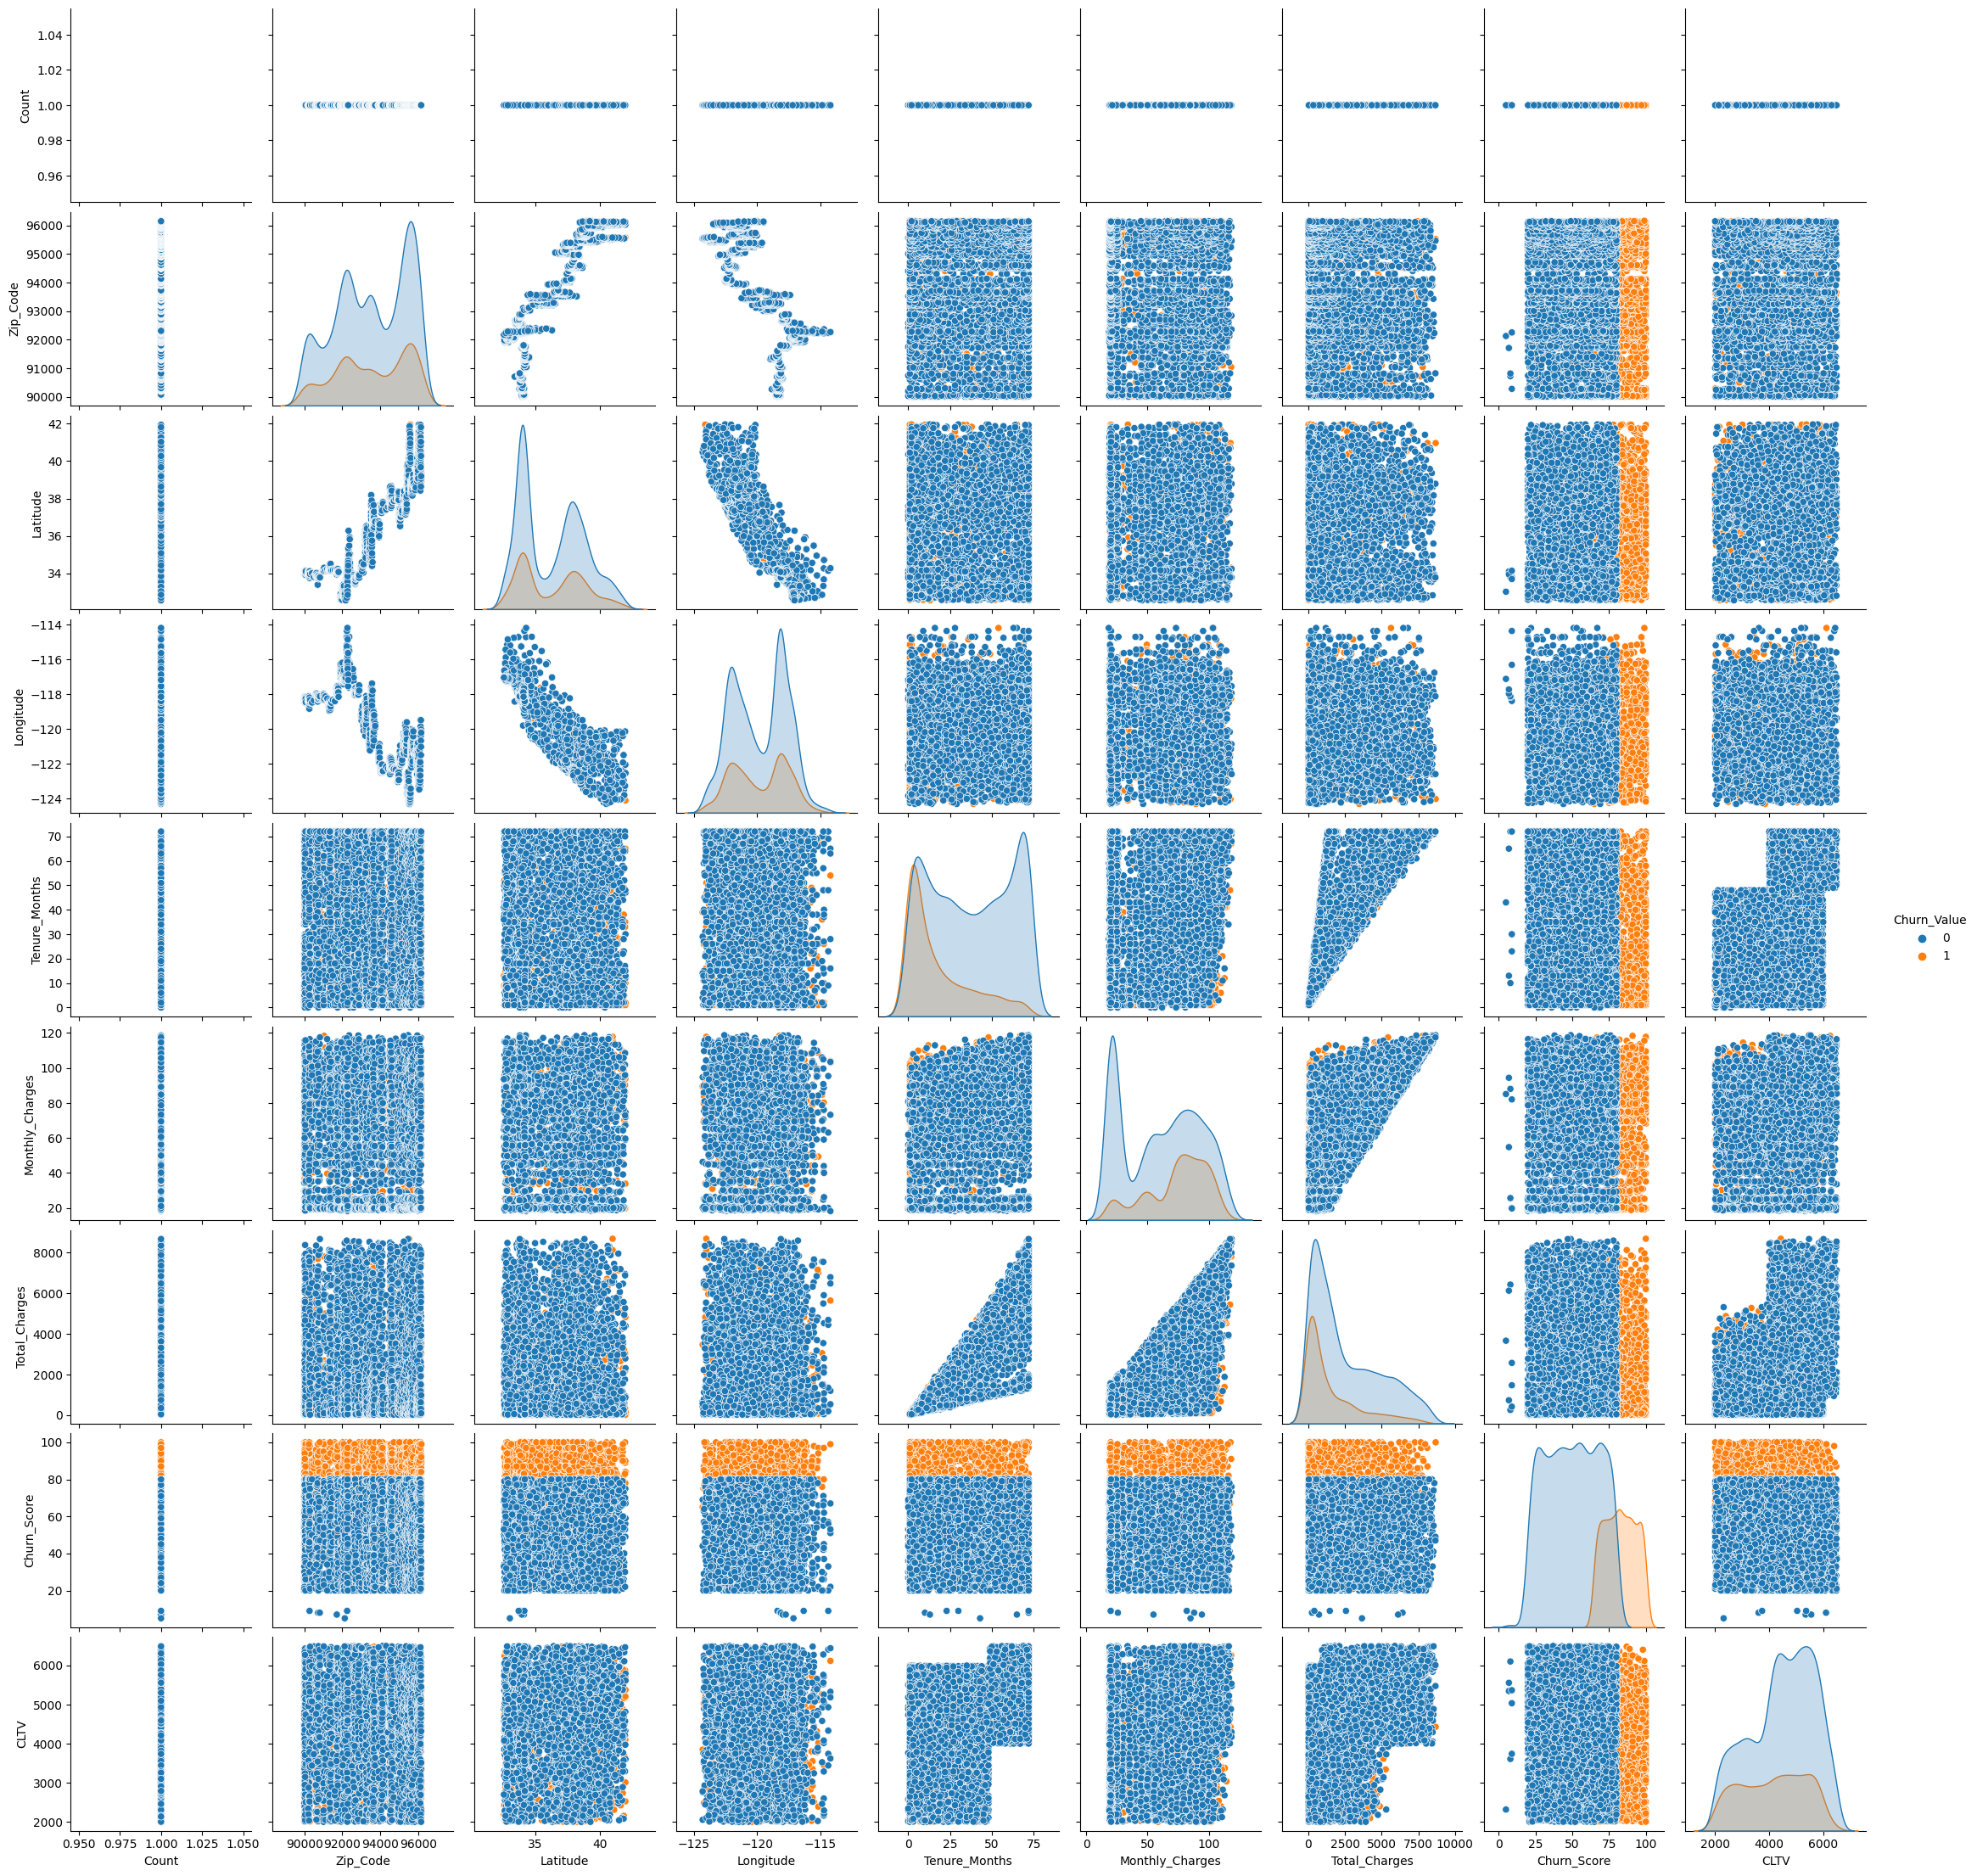

In [125]:
sns.pairplot(df.drop(columns='Senior_Citizen'),hue='Churn_Value', kind='scatter')
plt.show()

Text(0.5, 1.0, '% of Senior Citizens')

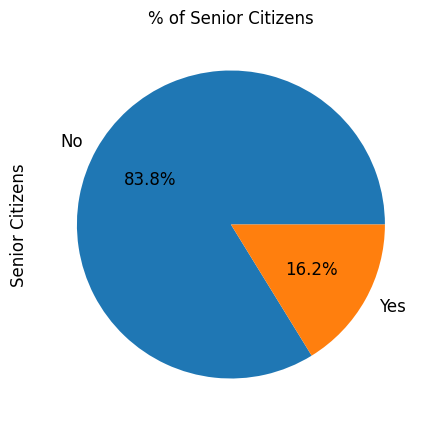

In [122]:
# pie chart for Count of Senior citizens
ax = (df['Senior_Citizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],
                figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

#### Only 16.2% customers who are senior citizons but remaining 83.8% customers are young people

<Figure size 640x480 with 0 Axes>

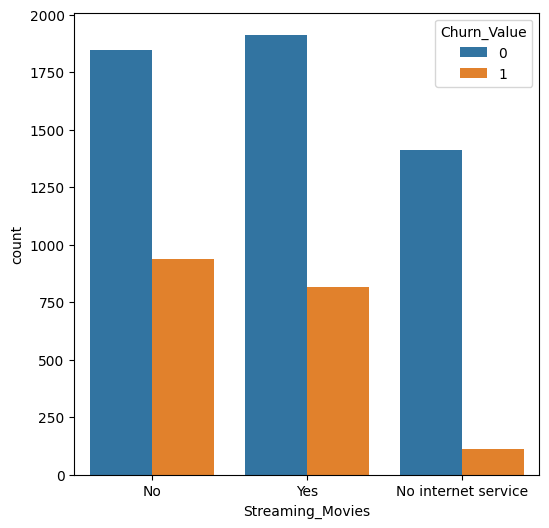

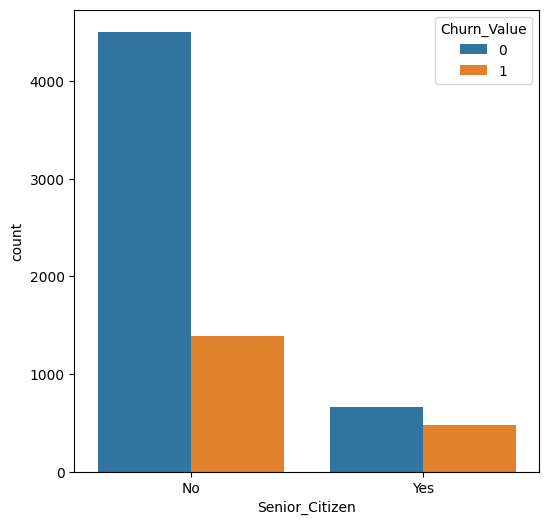

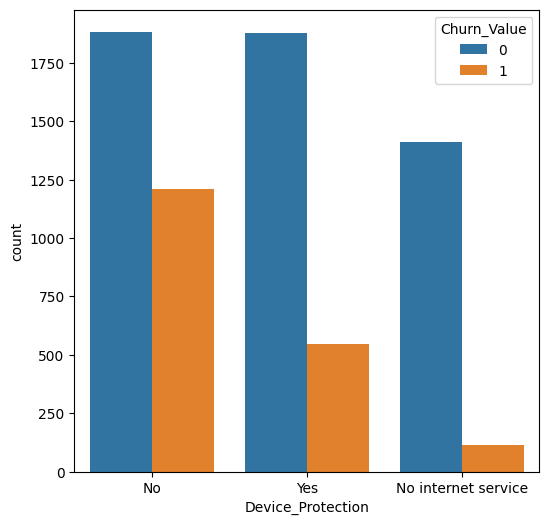

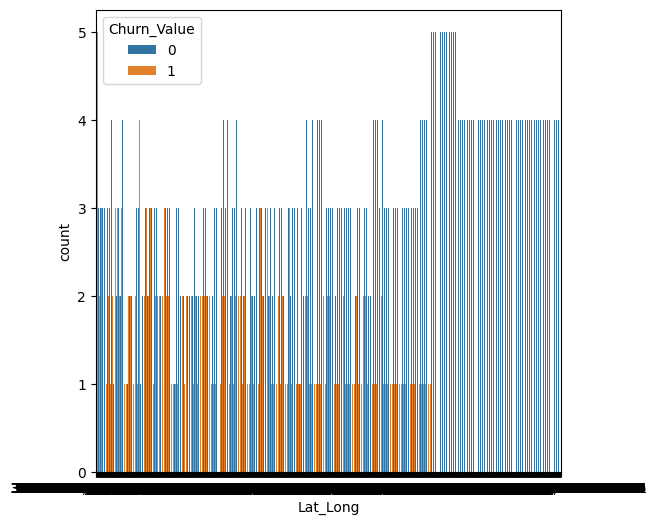

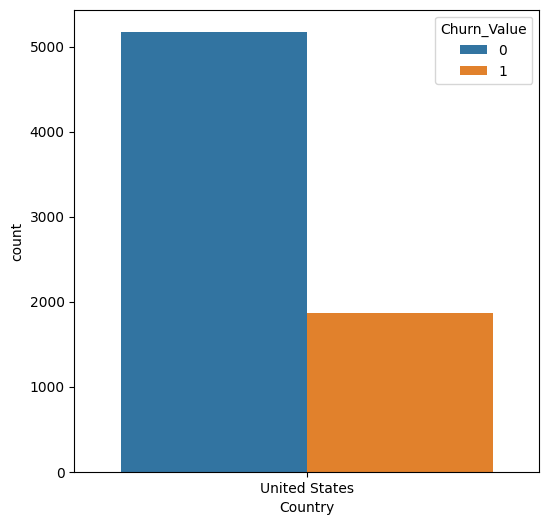

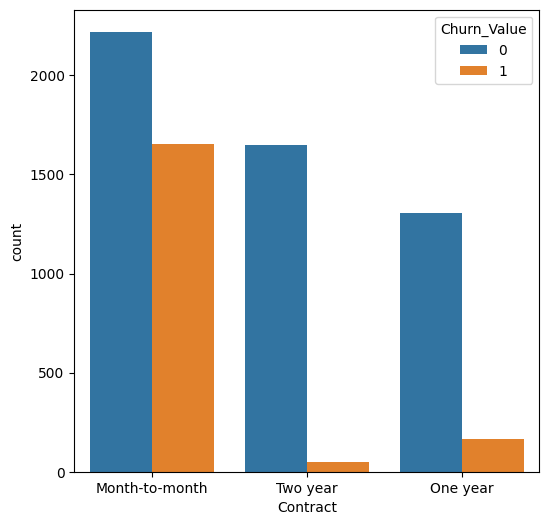

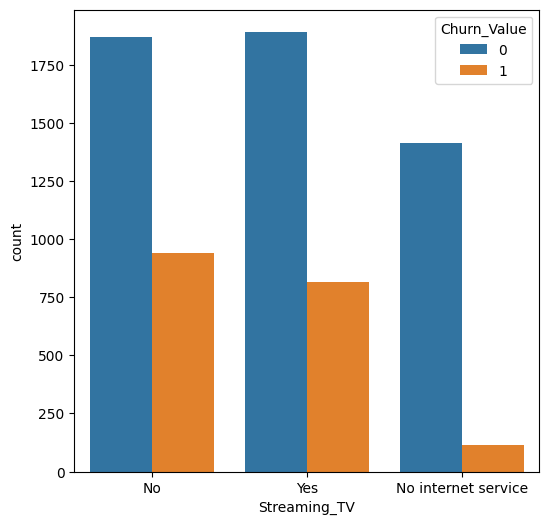

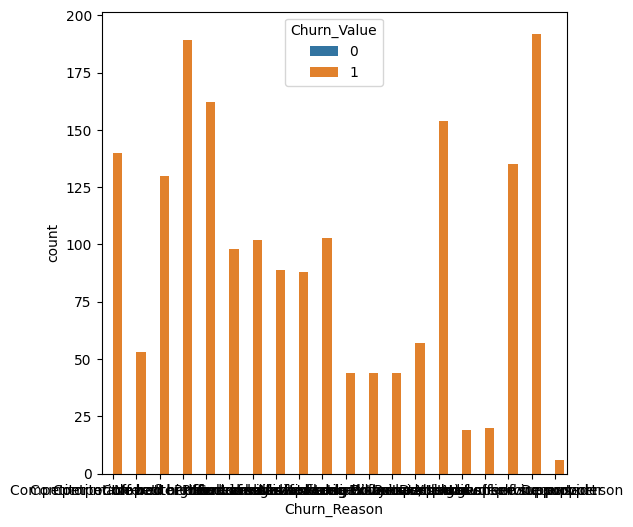

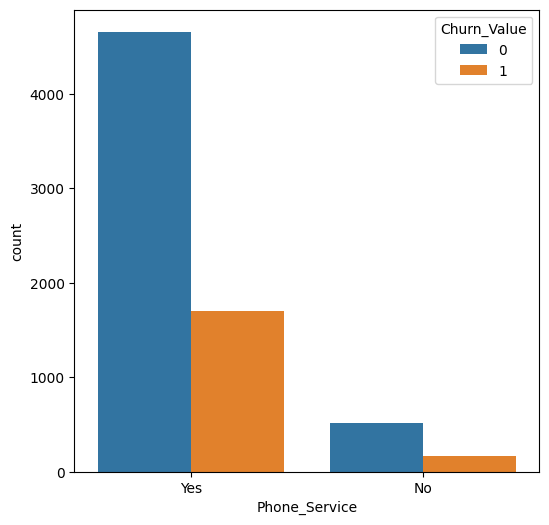

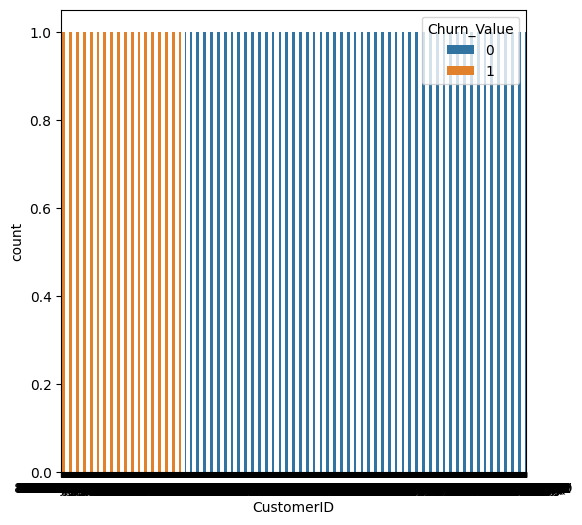

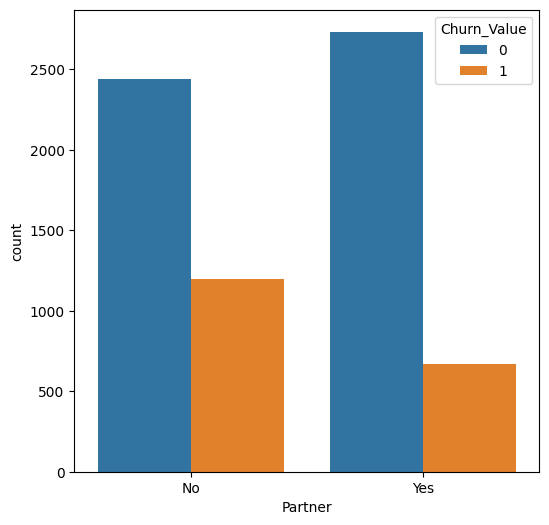

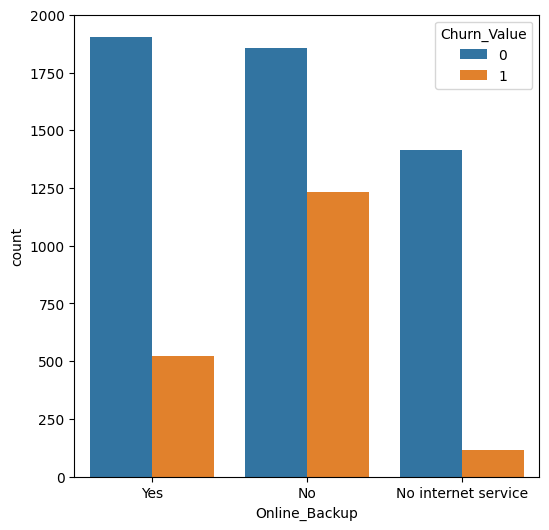

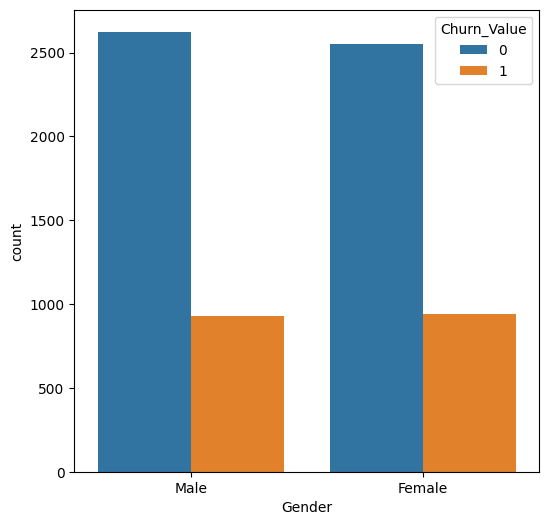

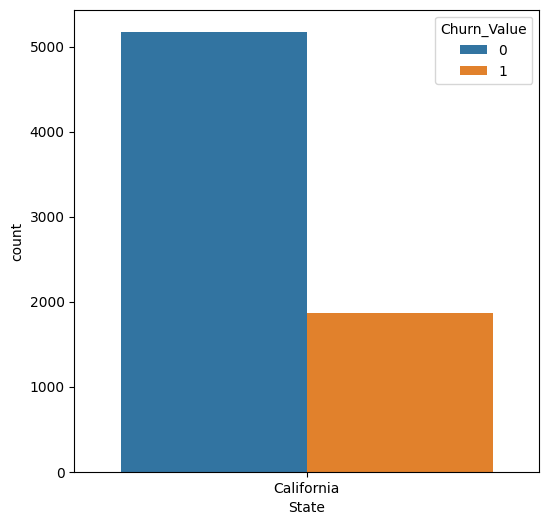

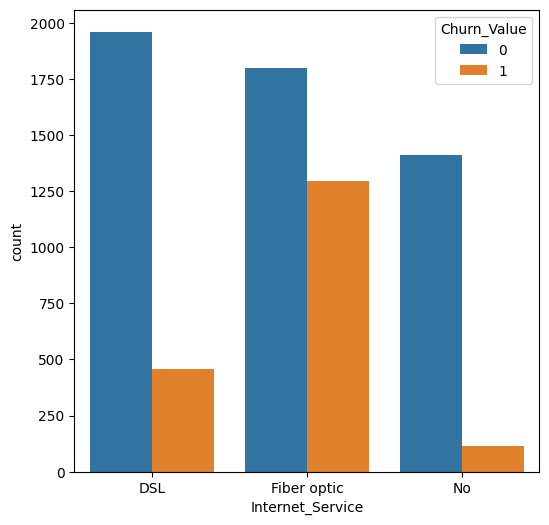

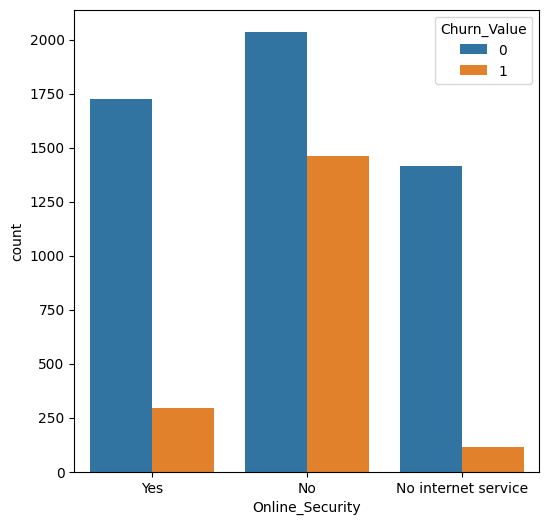

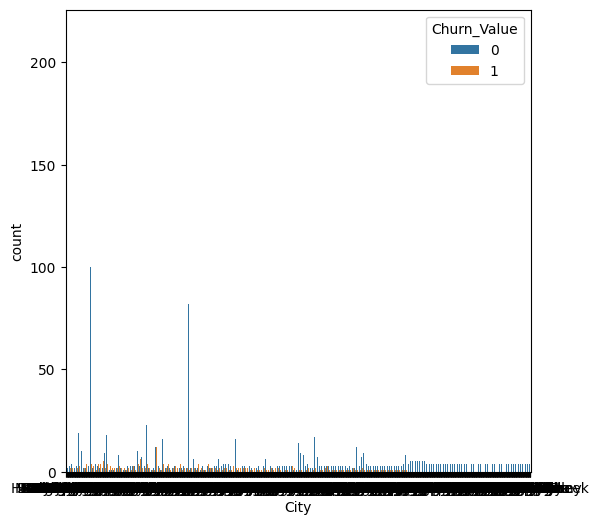

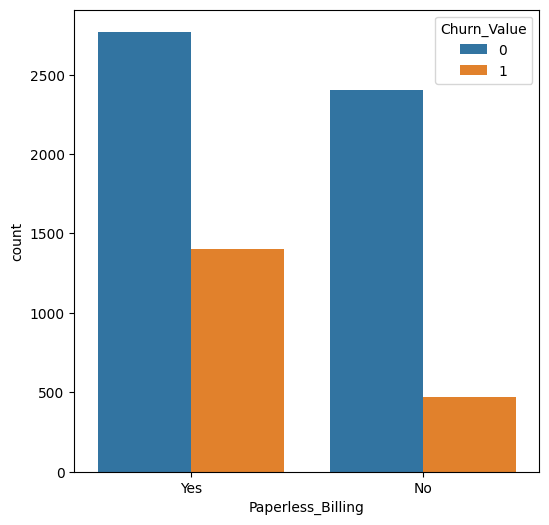

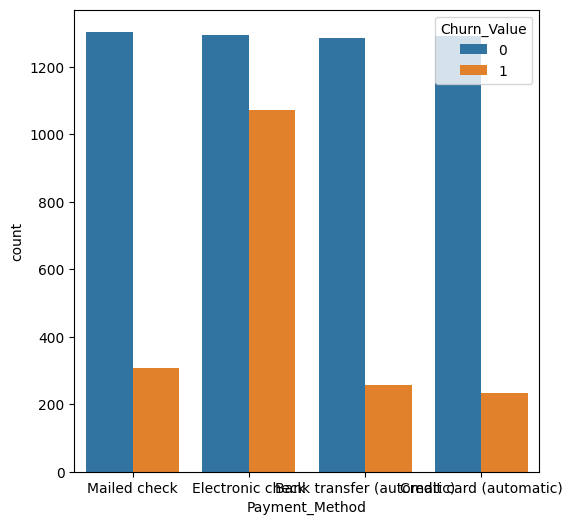

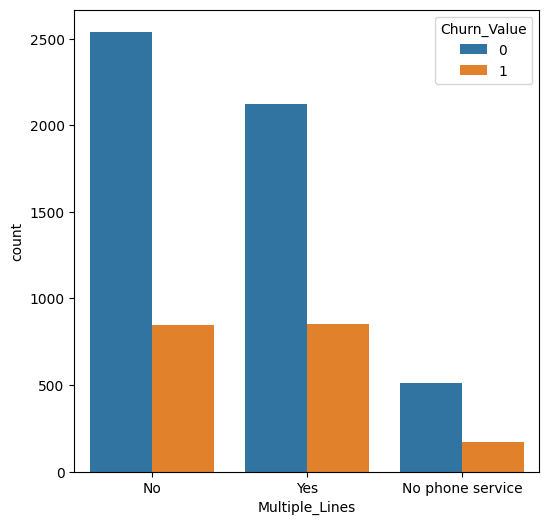

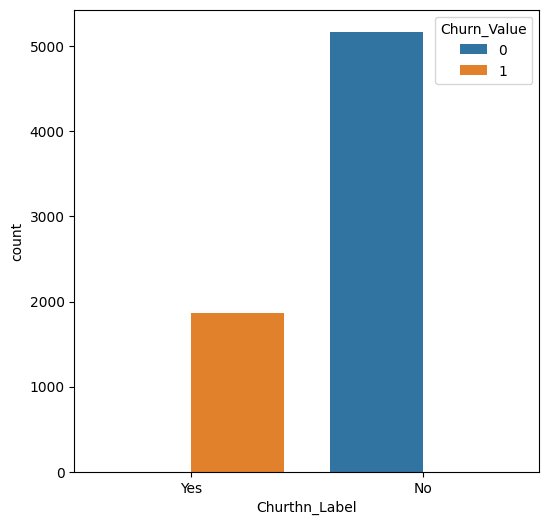

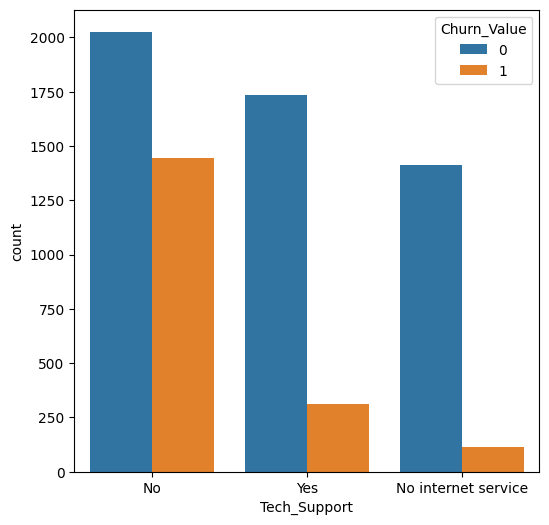

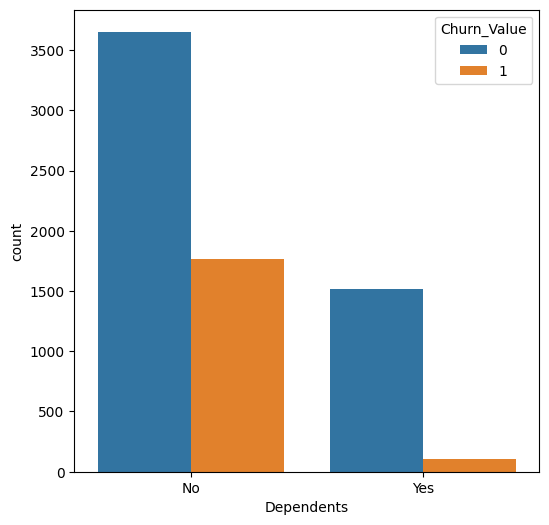

In [123]:
for i, feature in enumerate(categorical_feature):
    if feature != 'Total_Charges':
        if feature != 'customerID':
            plt.figure(i)
            plt.figure(figsize=(6,6))
            sns.countplot(data=df, x=feature, hue='Churn_Value')
plt.show()

In [126]:
# replace NaN values with mean value
df.Total_Charges = df.Total_Charges.fillna(df.Total_Charges.median())

<AxesSubplot: >

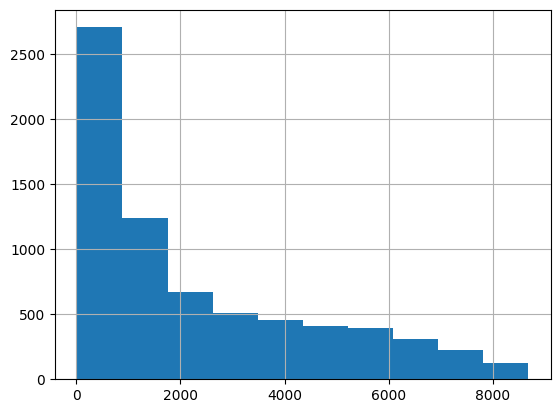

In [127]:
df.Total_Charges.hist()

#### In this dataset there is no null values, so we dont want to perform Handling missing values. Only perform the Feature     Encoding techiniques to convert the categorical feature into numerical feature

In [94]:
print(categorical_feature)

{'Streaming_Movies', 'Senior_Citizen', 'Device_Protection', 'Lat_Long', 'Country', 'Contract', 'Streaming_TV', 'Churn_Reason', 'Phone_Service', 'CustomerID', 'Partner', 'Online_Backup', 'Gender', 'State', 'Internet_Service', 'Online_Security', 'City', 'Paperless_Billing', 'Payment_Method', 'Multiple_Lines', 'Churthn_Label', 'Tech_Support', 'Dependents'}


In [95]:
encoder = LabelEncoder()
for feature in categorical_feature:
    df[feature] = encoder.fit_transform(df[feature])

In [96]:
df.head(2)

CustomerID  Count  Country  State  City  Zip_Code  Lat_Long   Latitude  \
0        2564      1        0      0   562     90003       327  33.964131   
1        6511      1        0      0   562     90005       405  34.059281   

    Longitude  Gender  ...  Contract  Paperless_Billing  Payment_Method  \
0 -118.272783       1  ...         0                  1               3   
1 -118.307420       0  ...         0                  1               2   

   Monthly_Charges  Total_Charges  Churthn_Label  Churn_Value  Churn_Score  \
0            53.85         108.15              1            1           86   
1            70.70         151.65              1            1           67   

   CLTV  Churn_Reason  
0  3239             3  
1  2701            13  

[2 rows x 33 columns]

<AxesSubplot: >

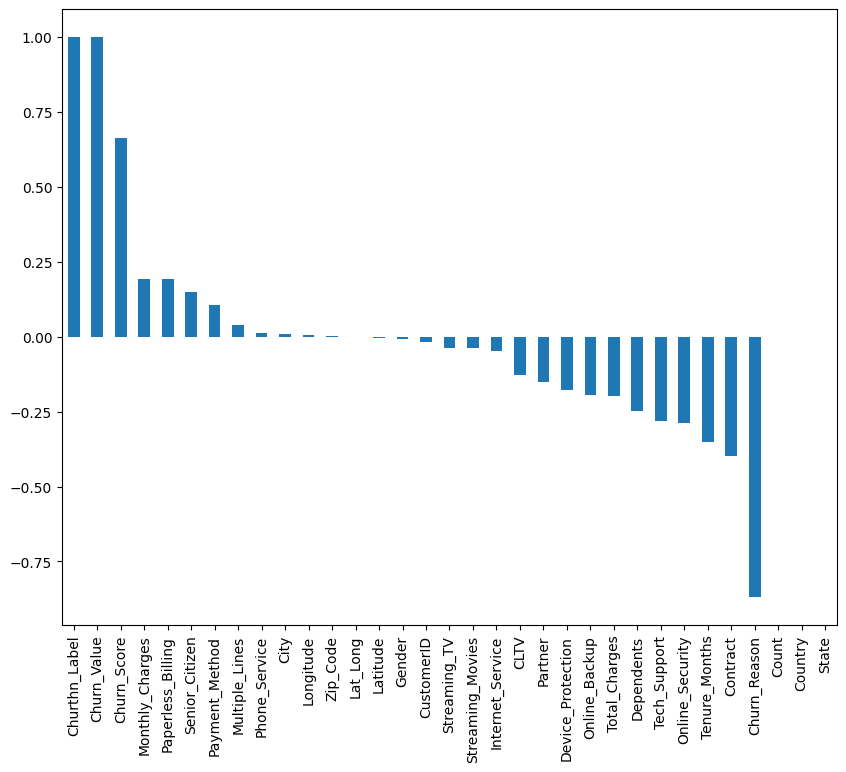

In [97]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(10,8))
df.corr()['Churn_Value'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot: >

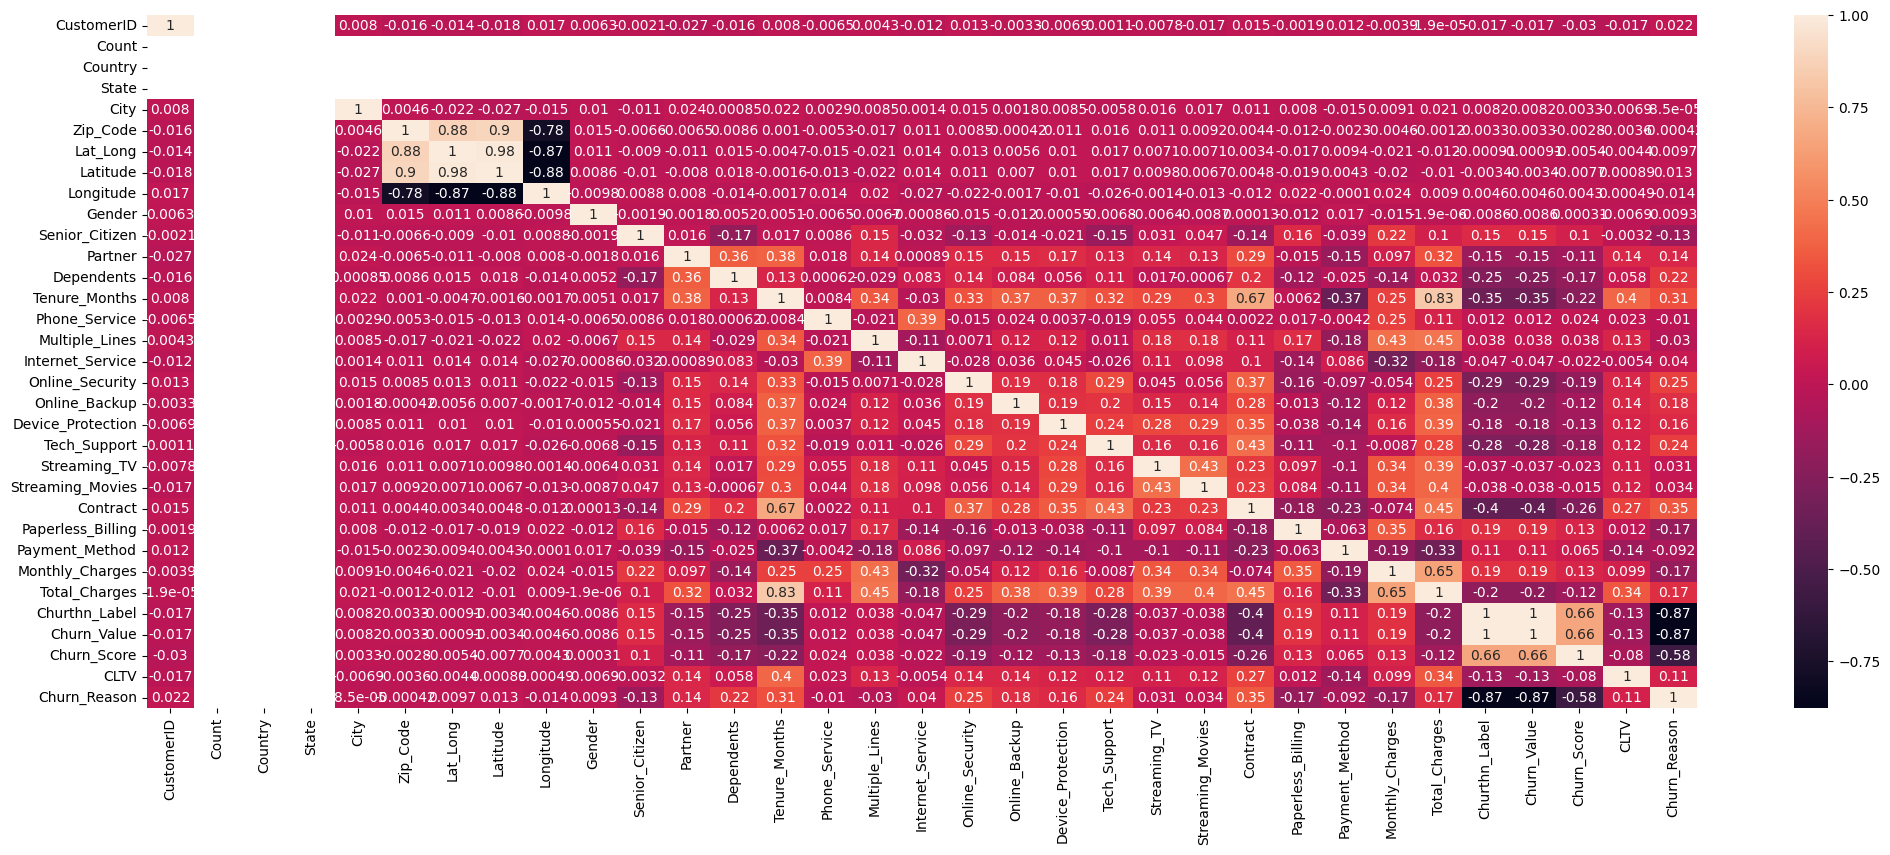

In [99]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(25, 9))
sns.heatmap(df.corr(), annot=True)

#### Iam using ensemble methods, No need to perform feature scaling for ensemble techniques, its prediction based on the creating multiple decision trees